In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import warnings

In [2]:
train = pd.read_csv("C:\\Users\\Harshita\\Desktop\\Twitter_Sentiment_Analysis\\Dataset\\train_tweet.csv")

train.columns = ['Sentiment','ID','Date','Query','User_ID','Text']
print('Length of Data',len(train))
print('Shape of the data',train.shape)
train.head()

Length of Data 1599999
Shape of the data (1599999, 6)


,Sentiment,ID,Date,Query,User_ID,Text
0,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
1,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
2,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
3,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
4,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew


In [3]:
train = train.drop(['ID','Date','Query','User_ID'],axis=1)
train['Sentiment'] = train['Sentiment'].map({0:'Negative',4:'Postive'})
train.head()

,Sentiment,Text
0,Negative,is upset that he can't update his Facebook by ...
1,Negative,@Kenichan I dived many times for the ball. Man...
2,Negative,my whole body feels itchy and like its on fire
3,Negative,"@nationwideclass no, it's not behaving at all...."
4,Negative,@Kwesidei not the whole crew


<AxesSubplot:>

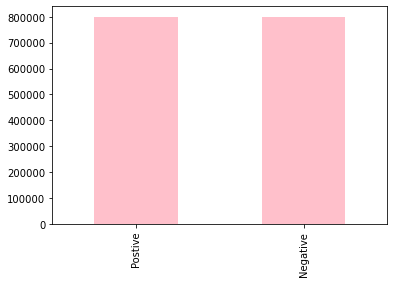

In [4]:
train['Sentiment'].value_counts().plot.bar(color = 'pink', figsize = (6, 4))

## Text Preprocessing

In [5]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
import re

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Harshita\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [6]:

stop_words = stopwords.words('english')
stemmer = SnowballStemmer('english')

text_cleaning_re = "@\S+|https?:\S+|http?:\S|[^A-Za-z0-9]+"

def preprocess(text, stem=False):
    text = re.sub(text_cleaning_re, ' ', str(text).lower()).strip()
    tokens = []
    for token in text.split():
        if token not in stop_words:
            if stem:
                tokens.append(stemmer.stem(token))
            else:
                tokens.append(token)
    return " ".join(tokens)

train['C_Text'] = train['Text'].apply(preprocess)

## Visualization

In [7]:
from wordcloud import WordCloud

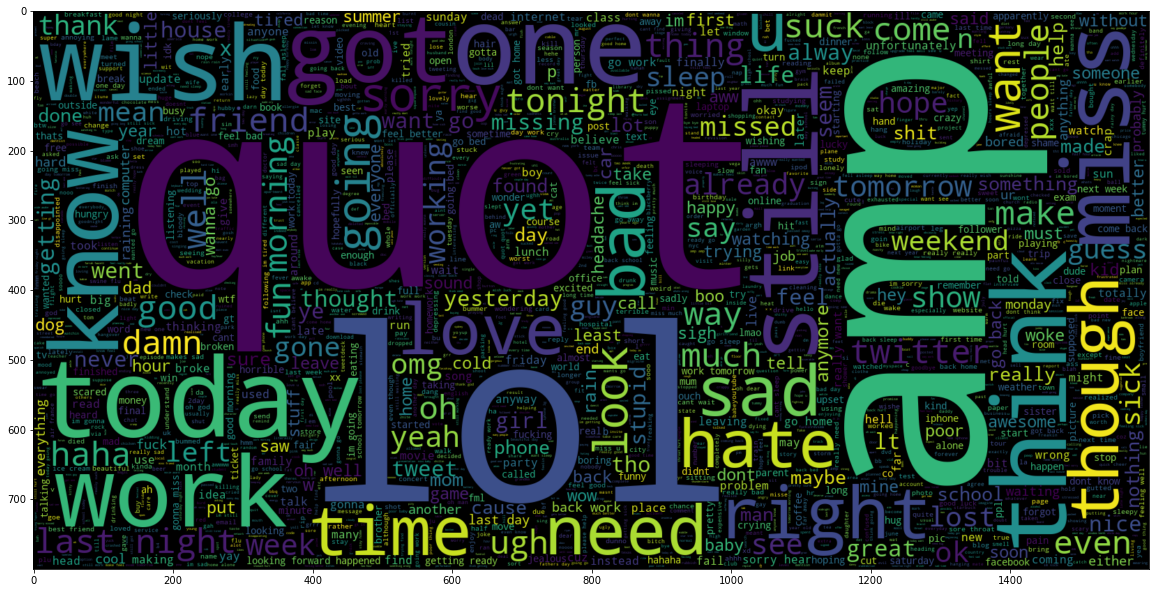

In [8]:
plt.figure(figsize = (20,20)) 
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800).generate(" ".join(train[train.Sentiment == 'Negative'].C_Text))
plt.imshow(wc , interpolation = 'bilinear')

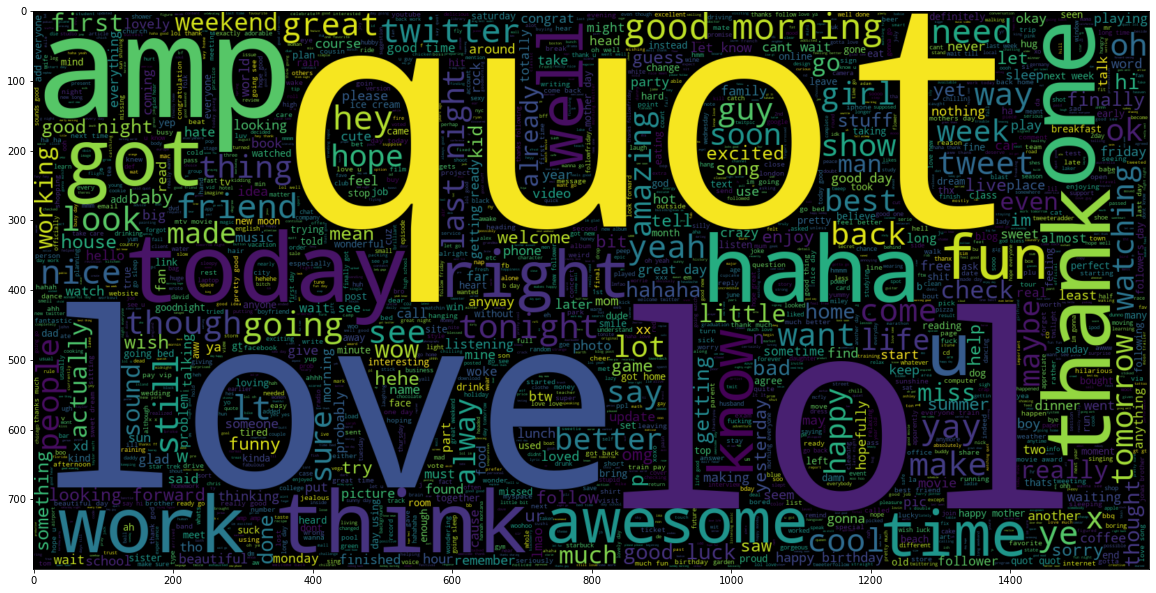

In [9]:
plt.figure(figsize = (20,20)) 
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800).generate(" ".join(train[train.Sentiment == 'Postive'].C_Text))
plt.imshow(wc , interpolation = 'bilinear')

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
x = train['C_Text']
y = train['Sentiment']

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)

print(x_train.shape)
print(x_test.shape)

(1279999,)
(320000,)


In [12]:
from keras.preprocessing.text import Tokenizer



In [13]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(x_train)
word_index = tokenizer.word_index # Contains the index of each word
vocab_size = len(tokenizer.word_index) + 1
print('Vocabulary Size', vocab_size)

Vocabulary Size 290442


In [14]:
from keras.preprocessing.sequence import pad_sequences

In [15]:
max_seq_len = 30
man_nb_words = 100000
x_train = pad_sequences(tokenizer.texts_to_sequences(x_train), maxlen=max_seq_len)
x_test = pad_sequences(tokenizer.texts_to_sequences(x_test), maxlen=max_seq_len)

print(x_train.shape)
print(x_test.shape)

(1279999, 30)
(320000, 30)


In [16]:
# standardization

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [17]:
from sklearn.ensemble import RandomForestClassifier


model = RandomForestClassifier()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

print("Training Accuracy :", model.score(x_train, y_train))
print("Validation Accuracy :", model.score(x_test, y_test))


Training Accuracy : 0.9894093667260677
Validation Accuracy : 0.618965625


In [18]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

print("Training Accuracy :", model.score(x_train, y_train))
print("Validation Accuracy :", model.score(x_test, y_test))

Training Accuracy : 0.5191175930606196
Validation Accuracy : 0.508878125


In [19]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

print("Training Accuracy :", model.score(x_train, y_train))
print("Validation Accuracy :", model.score(x_test, y_test))

Training Accuracy : 0.9894132729791195
Validation Accuracy : 0.595990625
